# Lognormal Distribution
Lognormal Distribution: x will have lognormal distribution if ln(x) has a normal distribution [1].

In [1]:
# import relevant packages
from scipy.stats import lognorm
from scipy import special
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

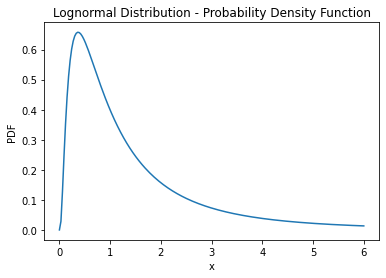

In [2]:
# visualise an example lognormal distribution
mean = 0.0
stddev = 1.0
dist = lognorm([stddev], loc=mean)

# visualise pdf of lognormal distribution
x = np.linspace(0, 6, 200)
pl.xlabel('x')
pl.ylabel('PDF')
pl.title('Lognormal Distribution - Probability Density Function')
pl.plot(x, dist.pdf(x))
pl.show()

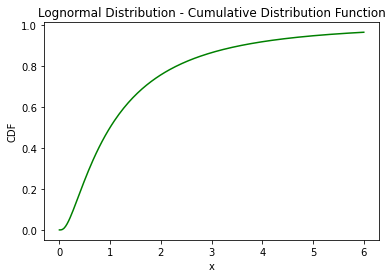

In [3]:
# visualise cdf of lognormal distribution
pl.xlabel('x')
pl.ylabel('CDF')
pl.title('Lognormal Distribution - Cumulative Distribution Function')
pl.plot(x, dist.cdf(x), '-g')
pl.show()

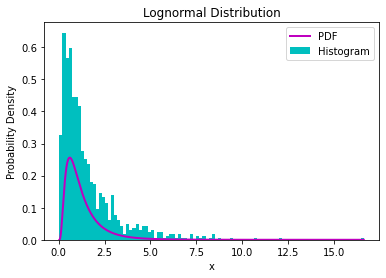

In [4]:
# visualise histogram and pdf of lognormal distribution
# implement pdf from its mathematical equation

# mean and standard deviation
mu, sigma = 0.0, 1.0

# lognormal distribution
s = np.random.lognormal(mu, sigma, 1000)

# plot histogram
count, bins, ignored = plt.hist(s, 100, density=True, align='mid', color='c', label='Histogram')

# plot pdf
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2) / 2 * sigma**2) / (x * sigma * np.sqrt(2*np.pi)) # expression for PDF [1]

plt.plot(x, pdf, linewidth=2, color='m', label='PDF')
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Lognormal Distribution')
plt.legend()
plt.show()

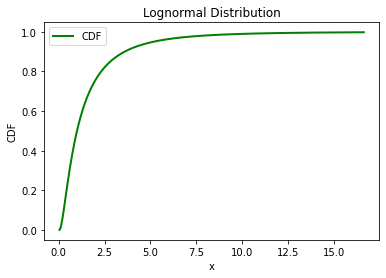

In [5]:
# visualise cdf of lognormal distribution
# implement cdf from its mathematical equation
cdf = 0.5 * (1 + special.erf((np.log(x) - mu) / (sigma * np.sqrt(2)))) # expression for CDF [1]

plt.plot(x, cdf, linewidth=2, color='g', label='CDF')
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Lognormal Distribution')
plt.legend()
plt.show()

## References
[1] https://en.wikipedia.org/wiki/Log-normal_distribution